In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import special

# Part 1b, plotting gaussian interference

In [2]:
x = np.linspace(-0.01,0.01,1000)
y = np.linspace(-0.01,0.01,1000)
X, Y = np.meshgrid(x, y)

# given beam parameters
lbda = 633e-9
k = 2*np.pi/lbda
w0 = 4e-6
z0 = w0**2 * np.pi/lbda

# spacing from waists to observation plane
z_1 = 1 + (0.05/2)
z_2 = 1 - (0.05/2) 

In [3]:
def rho(x,y): 
    return np.sqrt(x**2 + y**2)
def W(z): 
    return w0*np.sqrt(1 + ( z/z0 )**2)
def R(z): 
    return z*(1 + (z0/z)**2)
def zeta(z): 
    return np.arctan(z/z0)


In [4]:
def I(x, y, z_1, z_2): 
    rhoval = rho(x,y)
    I_1 = ( w0**2 / W(z_1)**2 ) * np.exp( -2*rhoval**2 / W(z_1)**2 ) 
    I_2 = ( w0**2 / W(z_2)**2 ) * np.exp( -2*rhoval**2 / W(z_2)**2 )
    I_12 = ( w0/W(z_1) ) * np.exp( -rhoval**2 / W(z_1)**2 )\
          *( w0/W(z_2) ) * np.exp( -rhoval**2 / W(z_2)**2 )\
          *2*np.cos( k*rhoval**2/(2*R(z_1)) + k*z_1 - zeta(z_1)\
                     -k*rhoval**2/(2*R(z_2)) - k*z_2 + zeta(z_2))
    return I_1 + I_2 + I_12

In [5]:
Intensity = I(X, Y, z_1, z_2)
Intensity_slice = I(0, Y, z_1, z_2)

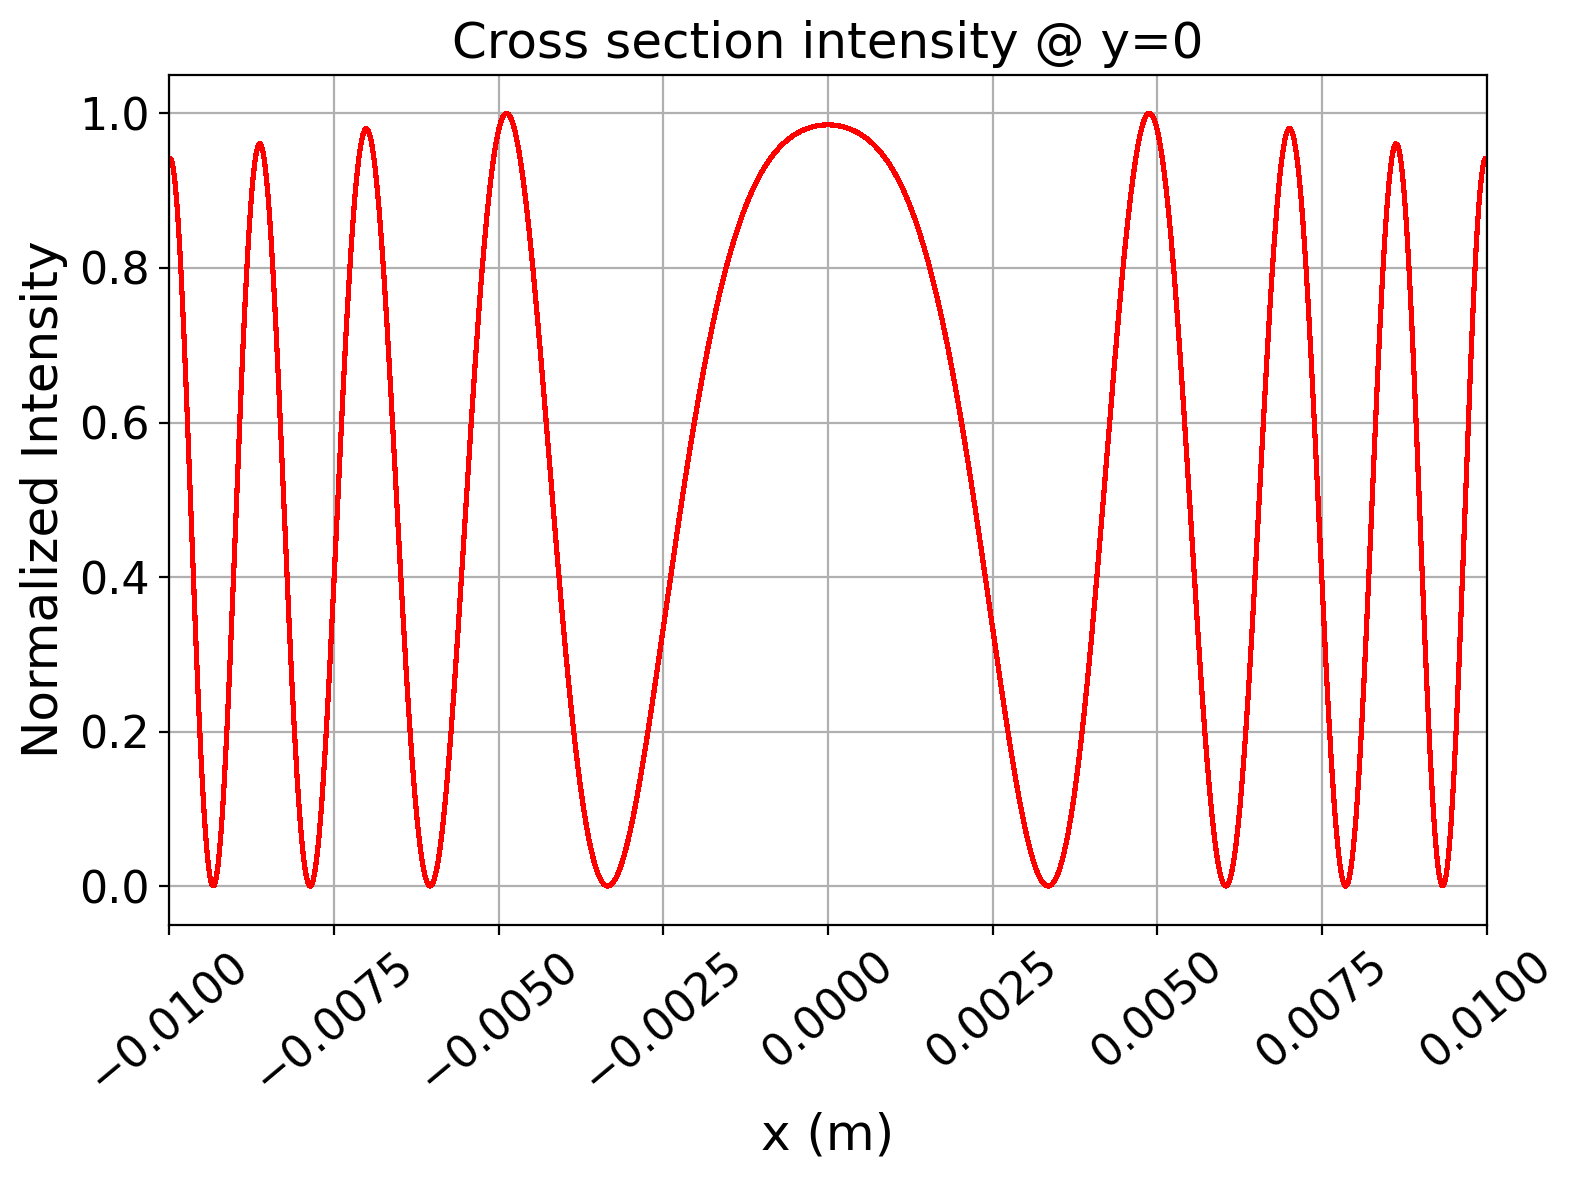

In [6]:
plt.figure(figsize=(8, 6), dpi=200)
plt.plot(y, Intensity_slice/np.amax(Intensity_slice), color='r')
plt.grid()
plt.xlim(-0.01,0.01)
plt.title('Cross section intensity @ y=0', fontsize=18)
plt.xlabel('x (m)', fontsize=18)
plt.ylabel('Normalized Intensity', fontsize=18)
plt.xticks(fontsize=16, rotation=40); plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('hw4_q1b_CS.png', dpi=200)

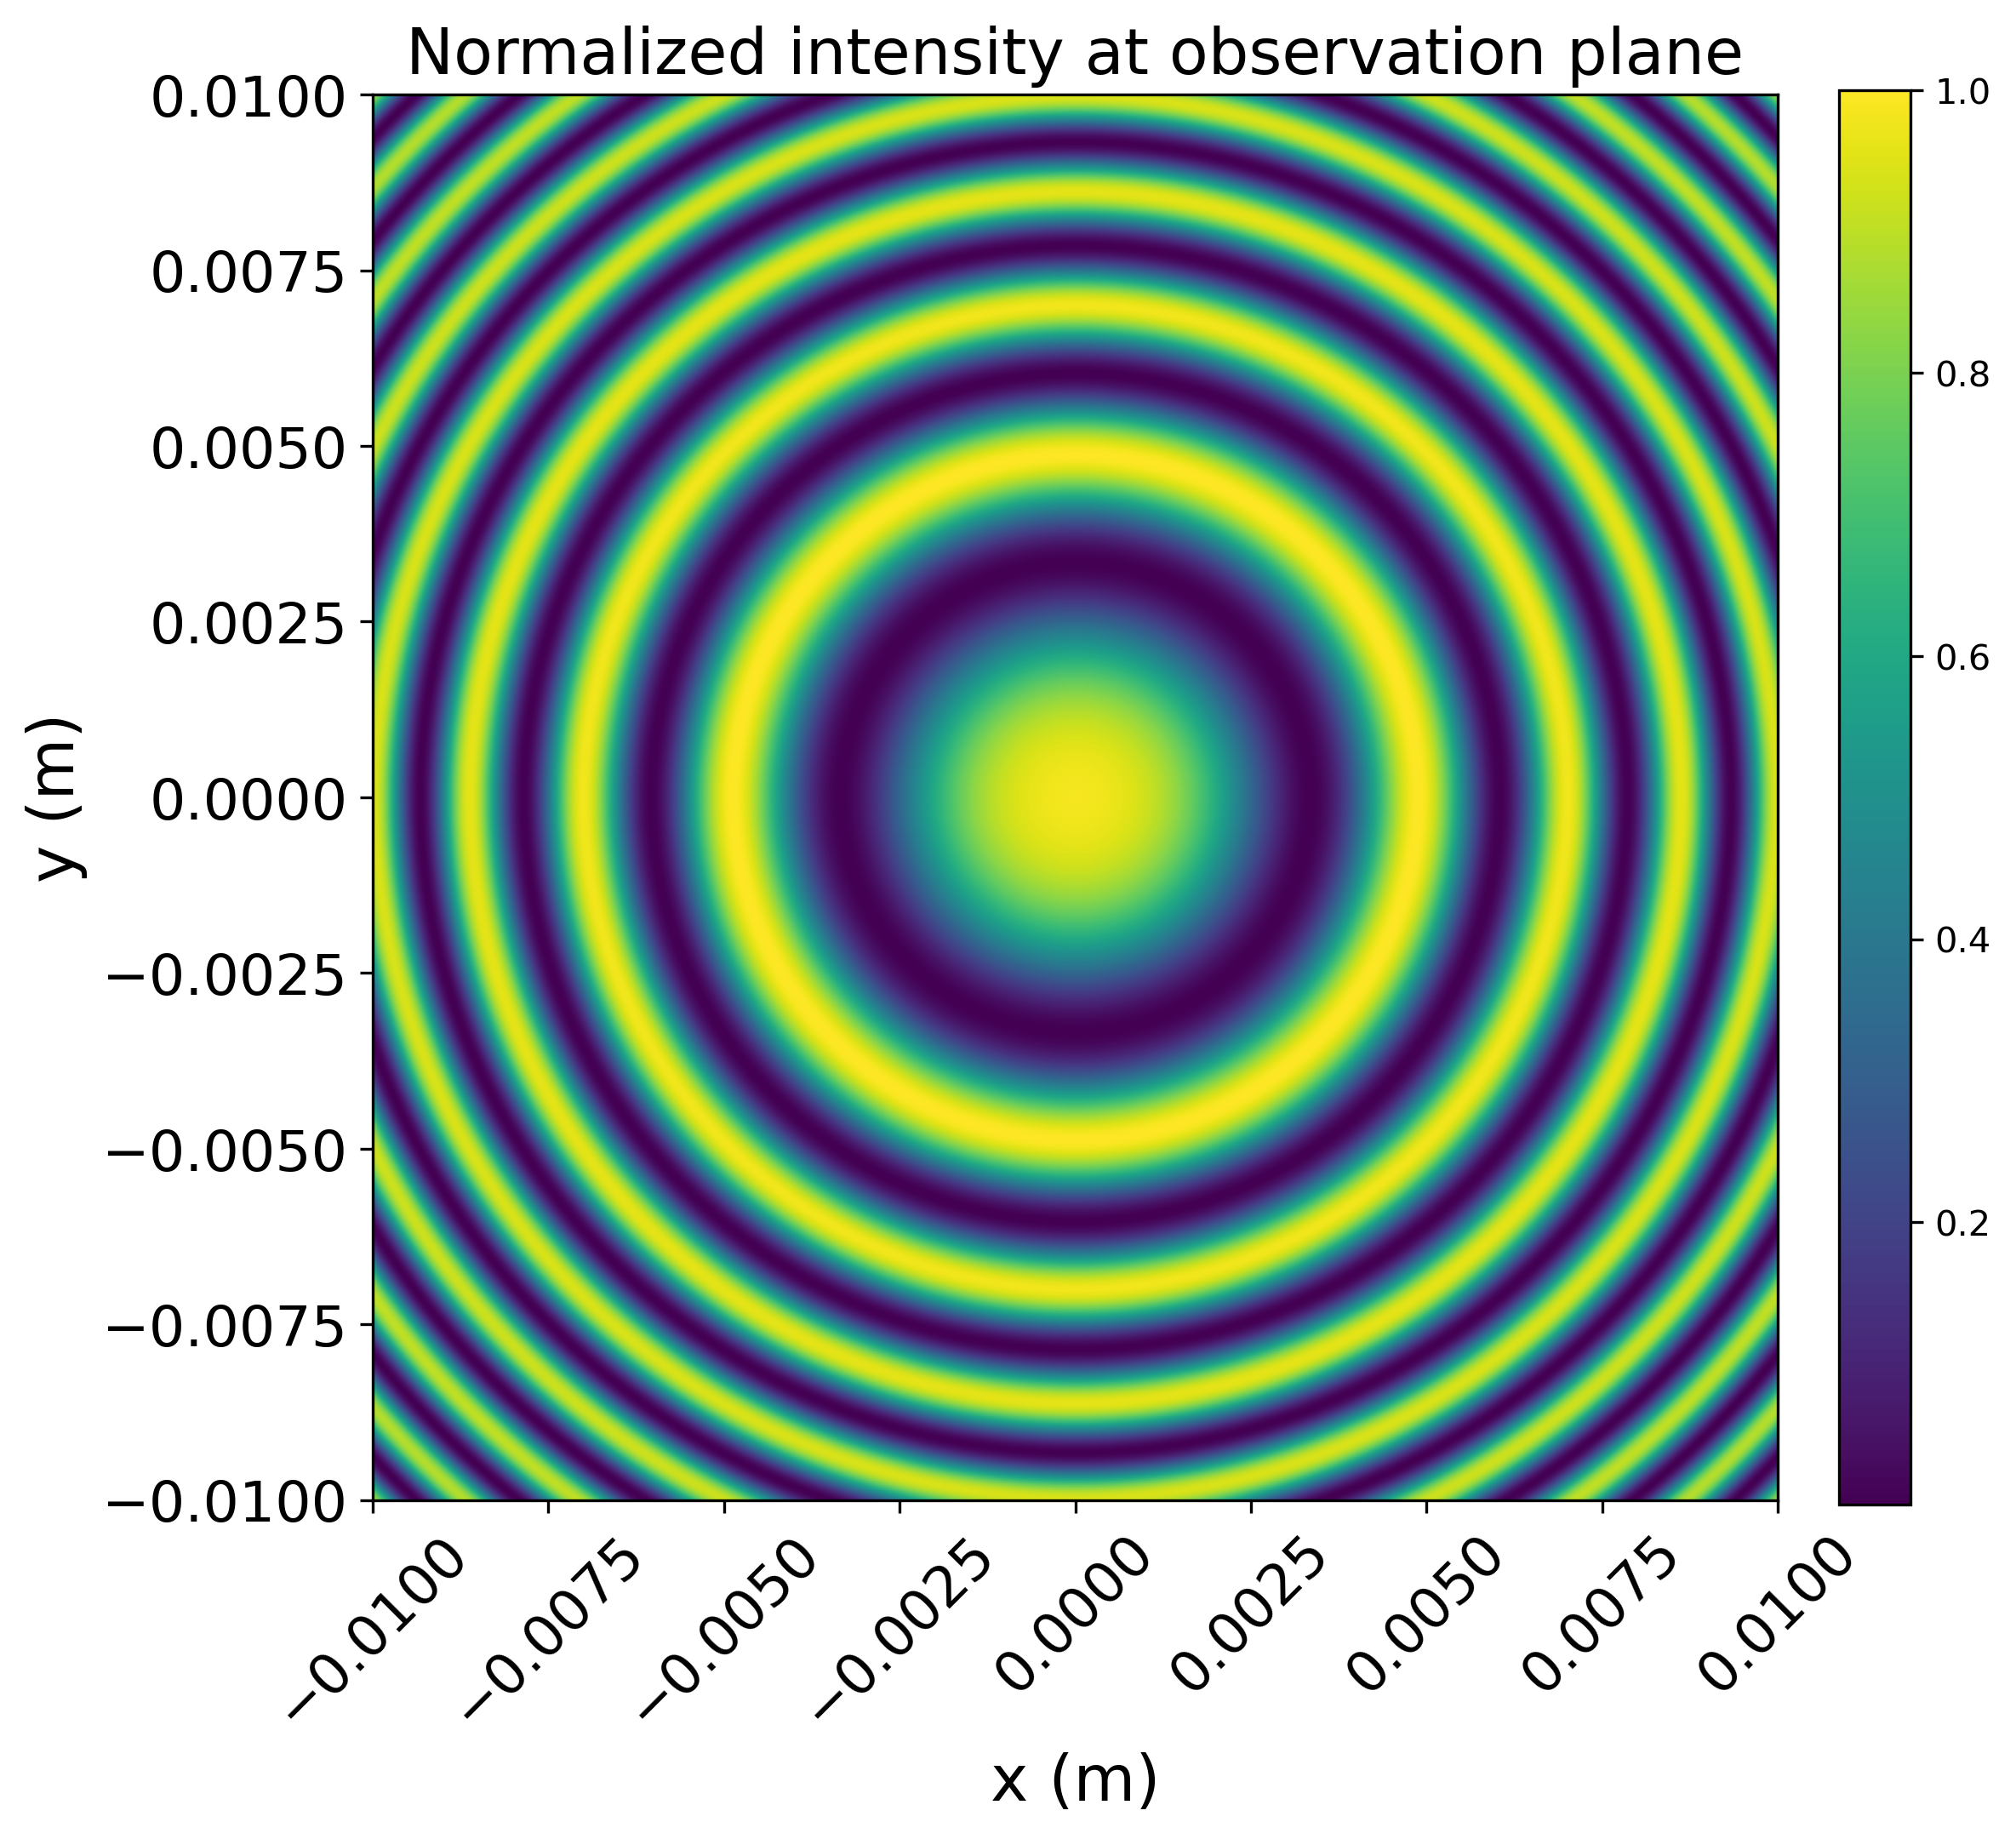

In [7]:
plt.figure(figsize=(8, 8), dpi=300)
plt.imshow(Intensity/np.amax(Intensity_slice), extent=[-0.01, 0.01, -0.01, 0.01], origin='lower',
           cmap='viridis', aspect=1)
plt.colorbar(fraction=0.046, pad=0.04)
plt.xlabel('x (m)', fontsize=18)
plt.ylabel('y (m)', fontsize=18)
plt.xticks(fontsize=16, rotation=45); plt.yticks(fontsize=16)
plt.title('Normalized intensity at observation plane',fontsize=18)
plt.tight_layout()
plt.savefig('hw4_q1b_xycolormap.png', dpi=300)

## Part 3, bragg mirror

In [153]:
n1 = 1.5
n2 = 1.38
# assuming phase pi/2
kd1 = np.pi/2
kd2 = kd1

Md1_2 = np.array([ [np.exp(kd1*1j/2), 0], [0, np.exp(-kd1*1j/2)] ])
Md2 = np.array([ [np.exp(kd2*1j), 0], [0, np.exp(-kd2*1j)] ])
M12 = (1/(2*n1))*np.array([ [n1+n2, n1-n2], [n1-n2, n1+n2] ])
M21 = (1/(2*n2))*np.array([ [n2+n1, n2-n1], [n2-n1, n2+n1] ])

In [154]:
# @ is matrix multiplication (calls np.matmul)
Mcell = Md1_2 @ M12 @ Md2 @ M21 @ Md1_2
Mcell = Mcell
Mcell_inv = np.linalg.inv(Mcell)

In [137]:
Mcell_cumulative = Md1_2
r_array = []; t_array = []
# array of 20 cells
ran = range(20)
for i in ran: 
    Mcell_cumulative = Mcell_cumulative @ Mcell
    t_array.append(np.linalg.det(Mcell_cumulative)/Mcell_cumulative[1,1])
    r_array.append(-Mcell_cumulative[1,0]/Mcell_cumulative[1,1])

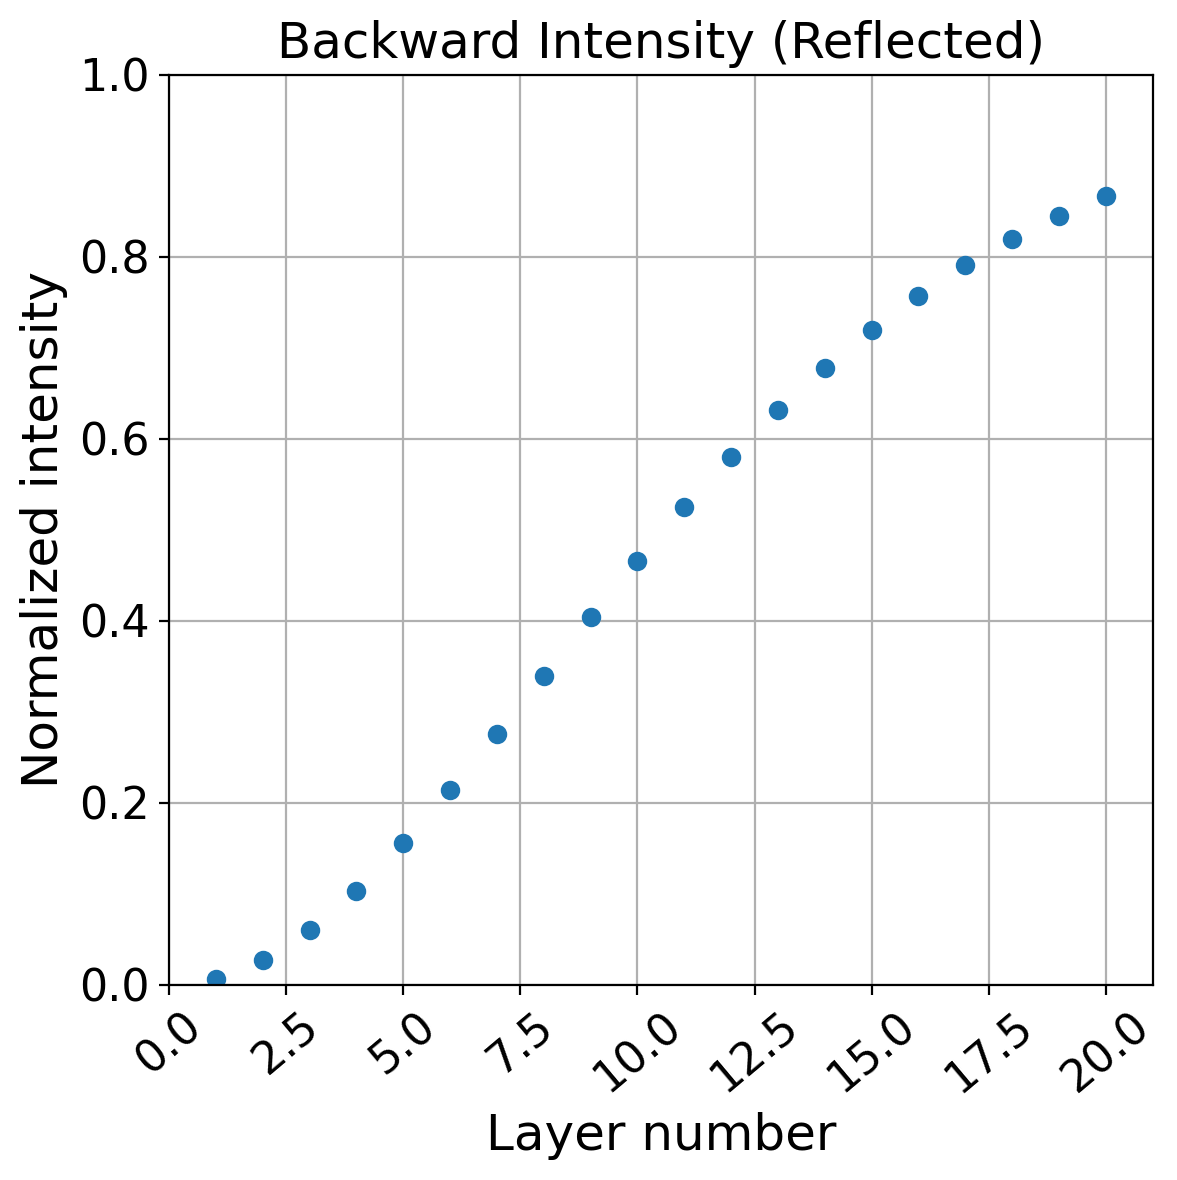

In [151]:
R_array = np.absolute(np.asarray(r_array))**2
plt.figure(figsize=(6, 6), dpi=200)
plt.plot(np.asarray(ran)+1, R_array, linestyle='', marker='o')
plt.grid(); 
plt.xlim(0,21); plt.ylim(0,1)
plt.title('Backward Intensity (Reflected)', fontsize=18)
plt.xlabel('Layer number', fontsize=18)
plt.ylabel('Normalized intensity', fontsize=18)
plt.xticks(fontsize=16, rotation=40); plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('hw4_q3a_r.png', dpi=200)


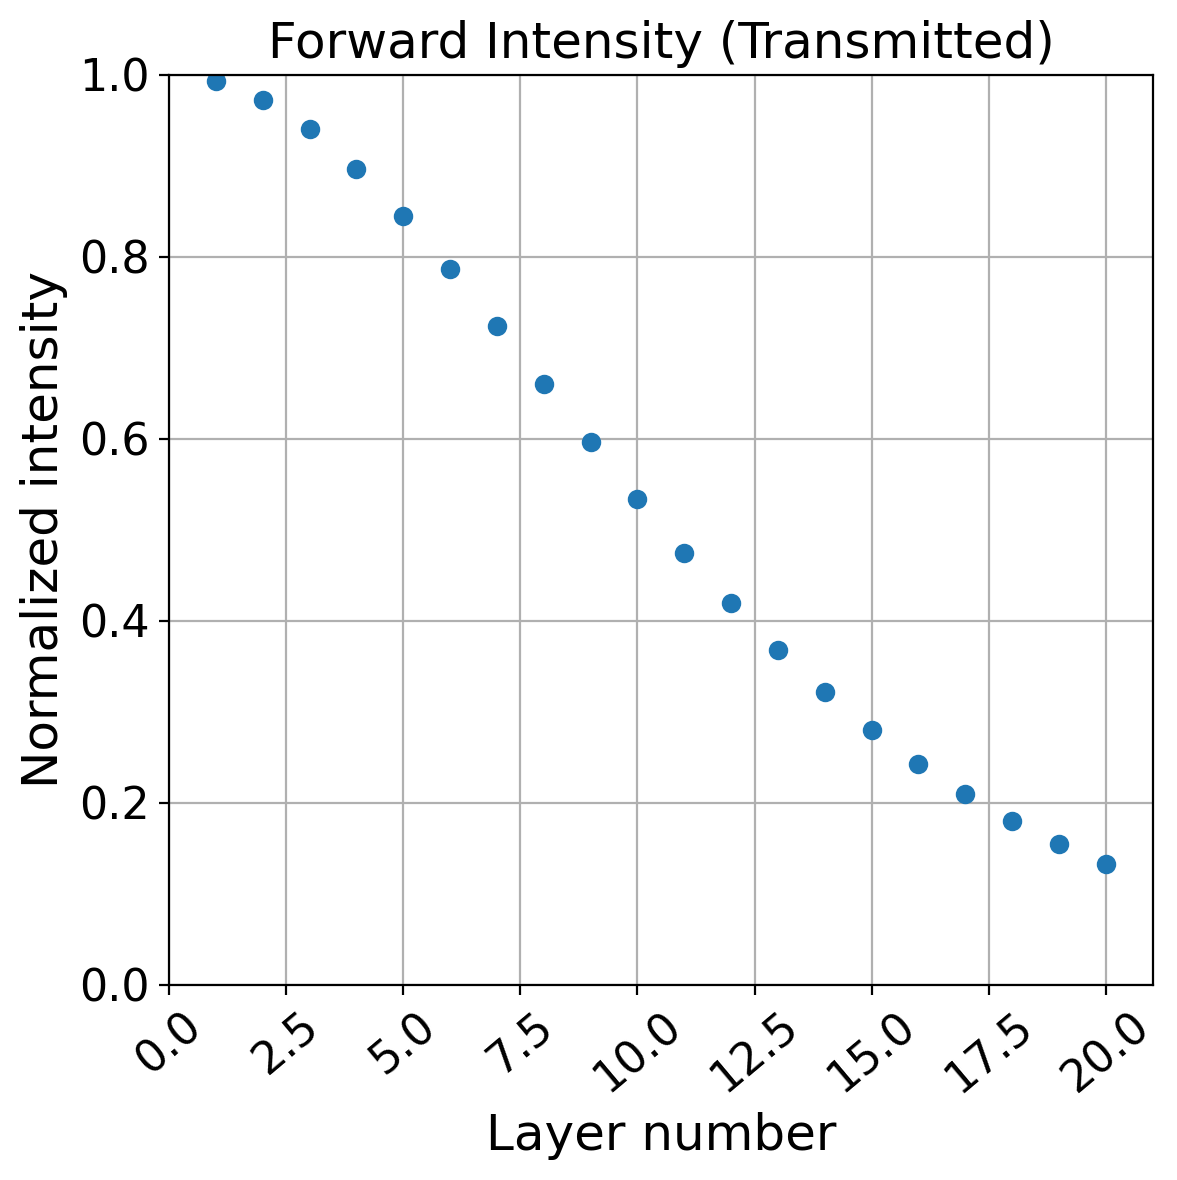

In [152]:
T_array = np.absolute(np.asarray(t_array))**2
plt.figure(figsize=(6, 6), dpi=200)
plt.plot(np.asarray(ran)+1, T_array, linestyle='', marker='o')
plt.grid(); 
plt.xlim(0,21); plt.ylim(0,1)
plt.title('Forward Intensity (Transmitted)', fontsize=18)
plt.xlabel('Layer number', fontsize=18)
plt.ylabel('Normalized intensity', fontsize=18)
plt.xticks(fontsize=16, rotation=40); plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('hw4_q3a_t.png', dpi=200)


In [140]:
T_array

array([0.99307961, 0.97269762, 0.93994815, 0.8965182 , 0.84450982,
       0.78623717, 0.7240298 , 0.66006678, 0.59625656, 0.53416679,
       0.47499973, 0.41960386, 0.36851018, 0.32198217, 0.28007054,
       0.24266629, 0.20954817, 0.18042257, 0.15495531, 0.1327959 ])

### Introducing a defect


In [156]:
n3 = 1.77
kd3 = np.pi

Md3 = np.array([ [np.exp(kd3*1j), 0], [0, np.exp(-kd3*1j)] ])
M13 = (1/(2*n1))*np.array([ [n1+n3, n1-n3], [n1-n3, n1+n3] ])
M31 = (1/(2*n3))*np.array([ [n3+n1, n3-n1], [n3-n1, n3+n1] ])

Mdefect = Md1_2 @ M13 @ Md3 @ M31 @ Md1_2

In [157]:
Mcell_cumulative_d = Md1_2
r_array_d = []; t_array_d = []
# array of 20 cells
ran = range(20)
for i in ran: 
    if i == 9: 
        Mcell_cumulative_d = Mcell_cumulative_d @ Mcell @ Mdefect
    else: 
        Mcell_cumulative_d = Mcell_cumulative_d @ Mcell
    t_array_d.append(np.linalg.det(Mcell_cumulative_d)/Mcell_cumulative_d[1,1])
    r_array_d.append(-Mcell_cumulative_d[1,0]/Mcell_cumulative_d[1,1])

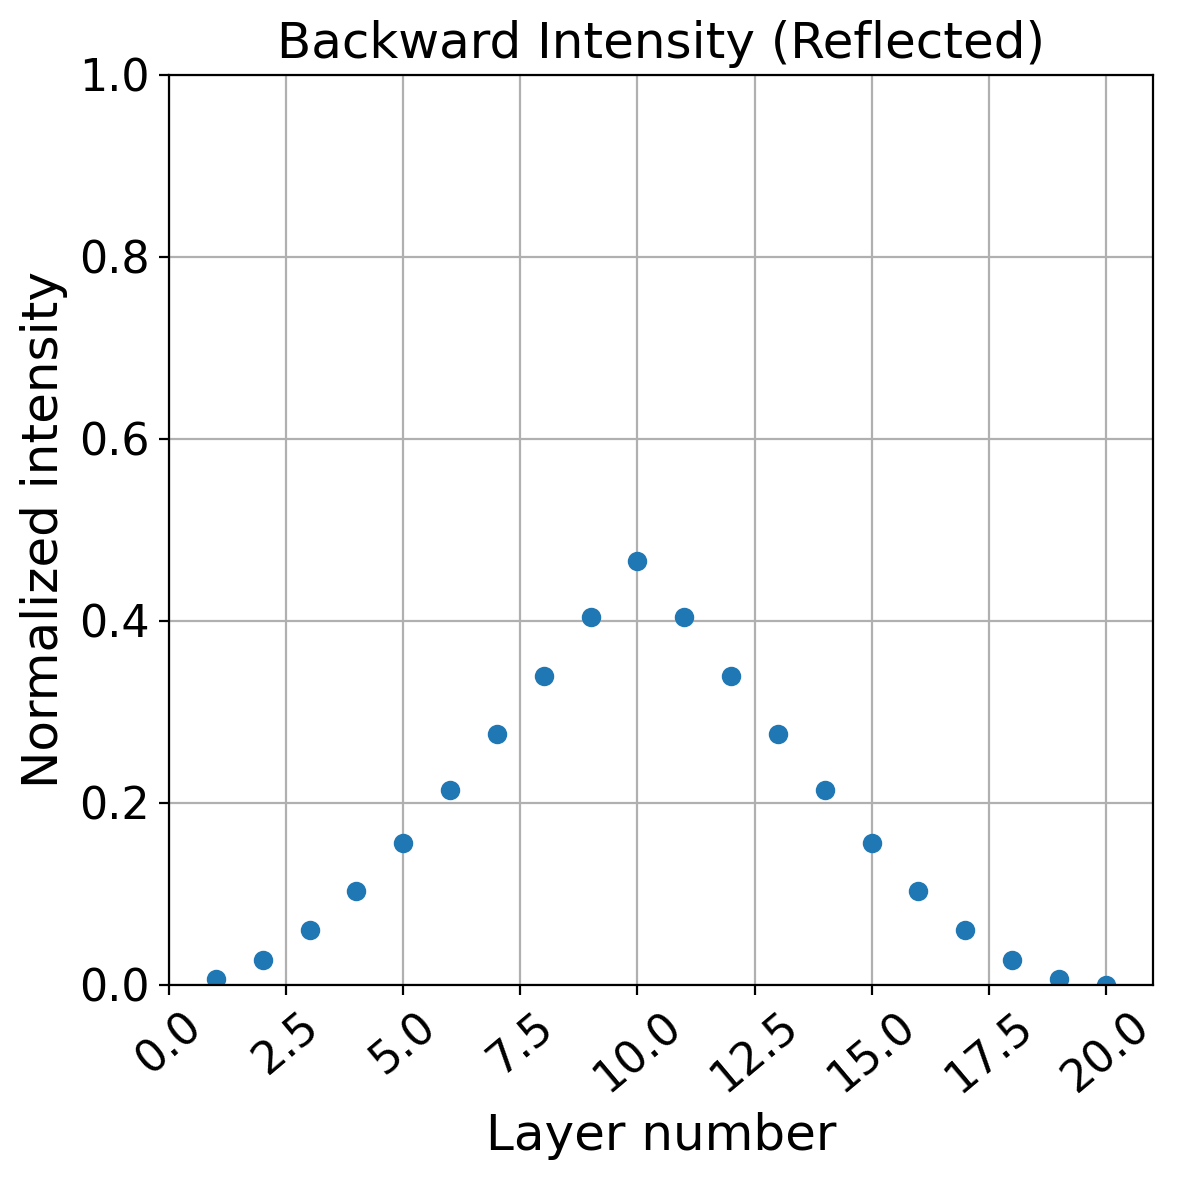

In [160]:
R_array_d = np.absolute(np.asarray(r_array_d))**2
plt.figure(figsize=(6, 6), dpi=200)
plt.plot(np.asarray(ran)+1, R_array_d, linestyle='', marker='o')
plt.grid(); 
plt.xlim(0,21); plt.ylim(0,1)
plt.title('Backward Intensity (Reflected)', fontsize=18)
plt.xlabel('Layer number', fontsize=18)
plt.ylabel('Normalized intensity', fontsize=18)
plt.xticks(fontsize=16, rotation=40); plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('hw4_q3b_r.png', dpi=200)


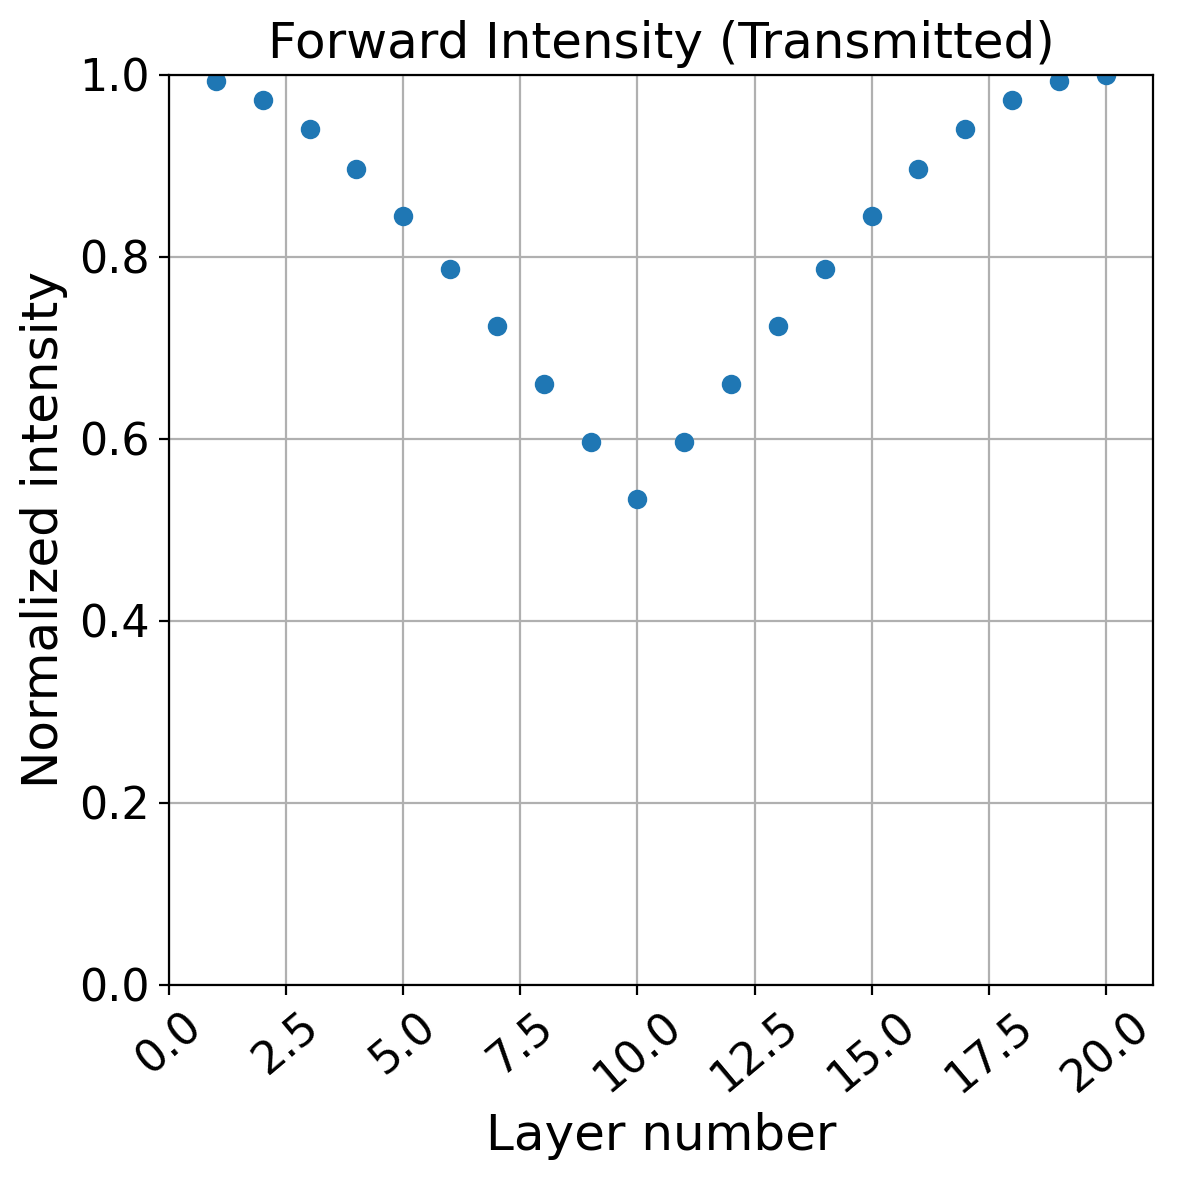

In [161]:
T_array_d = np.absolute(np.asarray(t_array_d))**2
plt.figure(figsize=(6, 6), dpi=200)
plt.plot(np.asarray(ran)+1, T_array_d, linestyle='', marker='o')
plt.grid(); 
plt.xlim(0,21); plt.ylim(0,1)
plt.title('Forward Intensity (Transmitted)', fontsize=18)
plt.xlabel('Layer number', fontsize=18)
plt.ylabel('Normalized intensity', fontsize=18)
plt.xticks(fontsize=16, rotation=40); plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('hw4_q3b_t.png', dpi=200)

In [9]:
d = 0.10 
g1 = 1-(d/0.08)
g2 = 1-(d/0.15)

z_02 = g1*g2*(1-g1*g2) * d**2/ ( g1+g2-2*g1*g2 )**2 
print(g1)
print(g2)
print(z_02)
print(np.sqrt(z_02))

-0.25
0.33333333333333326
-0.014444444444444454
nan


<ipython-input-9-d20ac6d62b6e>:9: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(z_02))


In [11]:
2*np.pi* (4.74e12) / 3e8

99274.32785343745